<a href="https://colab.research.google.com/github/sampica/Curso-Data-Science/blob/main/ENTREGA_DS__PARTE_II_SAMPIETRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción**

Se propone hacer una evaluación de los daños sufridos por las edificaciones como resultado del terremoto de mangnitud 7.8 en la escala de richter acaecido en el distrito de Gorkha, Gandaki, Nepal. Como producto de dicho cataclismo, fallecieron 9000 personas, millones quedaron sin hogar y se estimó una pérdida de 10 billones de dólares en daños.
El dataset es de libre uso, proveniente de un portal específico del gobierno de Nepal, y contiene principalmente información concerniente a la estructura de las edificacionesy nivel de daño sufrido. Existen además, otros datasets vinculados que poseen estadisticas socoeconómicas y demográficas de  los propietaros legales de los edificios (no usado en esta instancia de evaluación).
La evaluación de este dataset tiene por objetivo predecir (y por lo tanto prevenir) futuros daños edilicios. Está orientado al público en general, pudiendo ser utilizdo además a modo orientativo  para hacer evaluaciones de riesgo sísmico por parte de organismos gubernamentales.

#**Hipótesis**

Como hipotesis principal, se plantea que debería existir una correlación entre los daños sufridos por las edificaciones y las características de las mismas (pudiendo enumerarse: material fundacional,altura, número de pisos, antigüedad de la edificación, pendiente del terreno sobre la que estuviera montada la consrucción, material del techo, material del piso).
Dado que fallecieron 9000 personas y millones quedaron sin hogar, es de esperar que la fran mayoría de las construcciones hayan sufrido daño seveo (grados 5 y 4).
Puntualmente, se espera que, de haber una notoria proporción de daños severos, que sean pocos los edificios construidos con cemento reforzado o materiales similares.
A su vez, es de esperar que proporcionalmente hayan ocurrido mayores daños en aquellos edificaciones asentadas sobre superficies con pendientes naturales más pronunciadas.



In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib.ticker as mtick

In [ ]:
from google.colab import drive

In [ ]:
drive.mount ("5ta_preentrega_terremoto")

Mounted at 5ta_preentrega_terremoto


In [ ]:
%cd /content/5ta_preentrega_terremoto/MyDrive/5ta_preentrega_terremoto

/content/5ta_preentrega_terremoto/MyDrive/5ta_preentrega_terremoto


In [ ]:
%ls

5ta_preentrega_terremoto.ipynb           csv_household_earthquake_impact.csv
5ta_preentrega_terremoto_v2_FINAL.ipynb  csv_household_resources.csv
csv_building_damage_assessment.csv       csv_individual_demographics.csv
csv_building_ownership_and_use.csv       mapping.csv
csv_building_structure.csv               ward_vdcmun_district_name_mapping.csv
csv_household_demographics.csv


#**Data Wrangling**

In [ ]:
#Generando el DF de estructura edilicia
df_estructura = pd.read_csv('csv_building_structure.csv', index_col = 'building_id')

In [ ]:
#Mostrando el cabezal del dataset
df_estructura.head()


,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,1,1,9,288,9,9,Flat,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
120101000021,12,1207,120703,1,1,15,364,9,9,Flat,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
120101000031,12,1207,120703,1,1,20,384,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
120101000041,12,1207,120703,1,1,20,312,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
120101000051,12,1207,120703,1,1,30,308,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [ ]:
df_estructura.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762106 entries, 120101000011 to 366709001281
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   district_id                             762106 non-null  int64 
 1   vdcmun_id                               762106 non-null  int64 
 2   ward_id                                 762106 non-null  int64 
 3   count_floors_pre_eq                     762106 non-null  int64 
 4   count_floors_post_eq                    762106 non-null  int64 
 5   age_building                            762106 non-null  int64 
 6   plinth_area_sq_ft                       762106 non-null  int64 
 7   height_ft_pre_eq                        762106 non-null  int64 
 8   height_ft_post_eq                       762106 non-null  int64 
 9   land_surface_condition                  762106 non-null  object
 10  foundation_type                        

In [ ]:
#convirtiendo los valores de ID a objeto para evitar calculos estadísticos con los mismos
df_estructura= df_estructura.astype({'district_id': 'object', 'vdcmun_id': 'object', 'ward_id': 'object'})
df_estructura.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762106 entries, 120101000011 to 366709001281
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   district_id                             762106 non-null  object
 1   vdcmun_id                               762106 non-null  object
 2   ward_id                                 762106 non-null  object
 3   count_floors_pre_eq                     762106 non-null  int64 
 4   count_floors_post_eq                    762106 non-null  int64 
 5   age_building                            762106 non-null  int64 
 6   plinth_area_sq_ft                       762106 non-null  int64 
 7   height_ft_pre_eq                        762106 non-null  int64 
 8   height_ft_post_eq                       762106 non-null  int64 
 9   land_surface_condition                  762106 non-null  object
 10  foundation_type                        

Rapidamente se observa un mayor conteo de valores nulos en las dos últimas columnas, pero se buscarán los nulos de manera puntual para verificar

In [ ]:
# contar el numero de registros vacíos por columnas
nun_missing_struct = df_estructura.isnull().sum().reset_index()
print(nun_missing_struct)

                                     index   0
0                              district_id   0
1                                vdcmun_id   0
2                                  ward_id   0
3                      count_floors_pre_eq   0
4                     count_floors_post_eq   0
5                             age_building   0
6                        plinth_area_sq_ft   0
7                         height_ft_pre_eq   0
8                        height_ft_post_eq   0
9                   land_surface_condition   0
10                         foundation_type   0
11                               roof_type   0
12                       ground_floor_type   0
13                        other_floor_type   0
14                                position   1
15                      plan_configuration   1
16            has_superstructure_adobe_mud   0
17     has_superstructure_mud_mortar_stone   0
18           has_superstructure_stone_flag   0
19  has_superstructure_cement_mortar_stone   0
20     has_su

Dado que existen 762106 entradas en total, y solo doce filas con valores nulos en 4 columnas, se procede a eliminar dichos registros con valores nulos.

In [ ]:
df_estructura.dropna(inplace = True)

In [ ]:
nun_missing_struct = df_estructura.isnull().sum().reset_index()
print(nun_missing_struct)

                                     index  0
0                              district_id  0
1                                vdcmun_id  0
2                                  ward_id  0
3                      count_floors_pre_eq  0
4                     count_floors_post_eq  0
5                             age_building  0
6                        plinth_area_sq_ft  0
7                         height_ft_pre_eq  0
8                        height_ft_post_eq  0
9                   land_surface_condition  0
10                         foundation_type  0
11                               roof_type  0
12                       ground_floor_type  0
13                        other_floor_type  0
14                                position  0
15                      plan_configuration  0
16            has_superstructure_adobe_mud  0
17     has_superstructure_mud_mortar_stone  0
18           has_superstructure_stone_flag  0
19  has_superstructure_cement_mortar_stone  0
20     has_superstructure_mud_mort

Se verifica que ya no existen valores nulos

In [ ]:
#Obteniendo los estadísticos básicos y redondeando
df_estructura.describe().round(1)

,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
count,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0,762094.0
mean,2.1,1.3,24.3,406.7,16.0,9.9,0.0,0.8,0.0,0.0,0.0,0.1,0.3,0.1,0.0,0.0,0.0
std,0.7,1.1,65.0,226.8,5.5,8.6,0.2,0.4,0.2,0.1,0.1,0.3,0.4,0.3,0.2,0.1,0.1
min,1.0,0.0,0.0,70.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.0,0.0,9.0,280.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2.0,1.0,16.0,358.0,16.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2.0,2.0,27.0,470.0,18.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
max,9.0,9.0,999.0,5000.0,99.0,99.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
#Buscando outliers
def find_outliers_IQR(df_estructura):
    q1=df_estructura.quantile(0.25)
    q3=df_estructura.quantile(0.75)
    IQR=q3-q1
    outliers = df_estructura[((df_estructura<(q1-1.5*IQR)) | (df_estructura>(q3+1.5*IQR)))]
    return outliers

In [ ]:
# Buscando porcentaje de outliers. Recurso válido ara las columnas 3 a 8 que contienen datos númericos no booleanos, es decir,que no son del tipo 1(verdadero y 0(falso)
index = find_outliers_IQR(df_estructura["plinth_area_sq_ft"]).index
print(f"percentage of outliers = {round(len(index)/df_estructura.shape[0],2)}")

percentage of outliers = 0.06


In [ ]:
#Solo un 6% de los datos son outliers, se procede a eliminarlos
df_estructura=df_estructura.drop(index,axis=0)

In [ ]:
#Obteniendo los estadísticos básicos y redondeando
df_estructura.describe().round(1)

,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
count,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0,717369.0
mean,2.1,1.2,24.5,366.7,15.9,9.6,0.0,0.8,0.0,0.0,0.0,0.1,0.3,0.1,0.0,0.0,0.0
std,0.6,1.0,64.7,134.4,5.2,8.3,0.2,0.4,0.2,0.1,0.1,0.2,0.4,0.3,0.2,0.1,0.1
min,1.0,0.0,0.0,70.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.0,0.0,9.0,270.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2.0,1.0,16.0,350.0,16.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2.0,2.0,27.0,450.0,18.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
max,9.0,9.0,999.0,755.0,99.0,99.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


##**EDA**

**Primer insight de correlaciones entre variables usando un heatmap de correlación de seaborn**

<ipython-input-13-6f2b9240ebb4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_estructura.corr(), cmap="crest", annot=True, linewidth=.5, fmt='.2f')


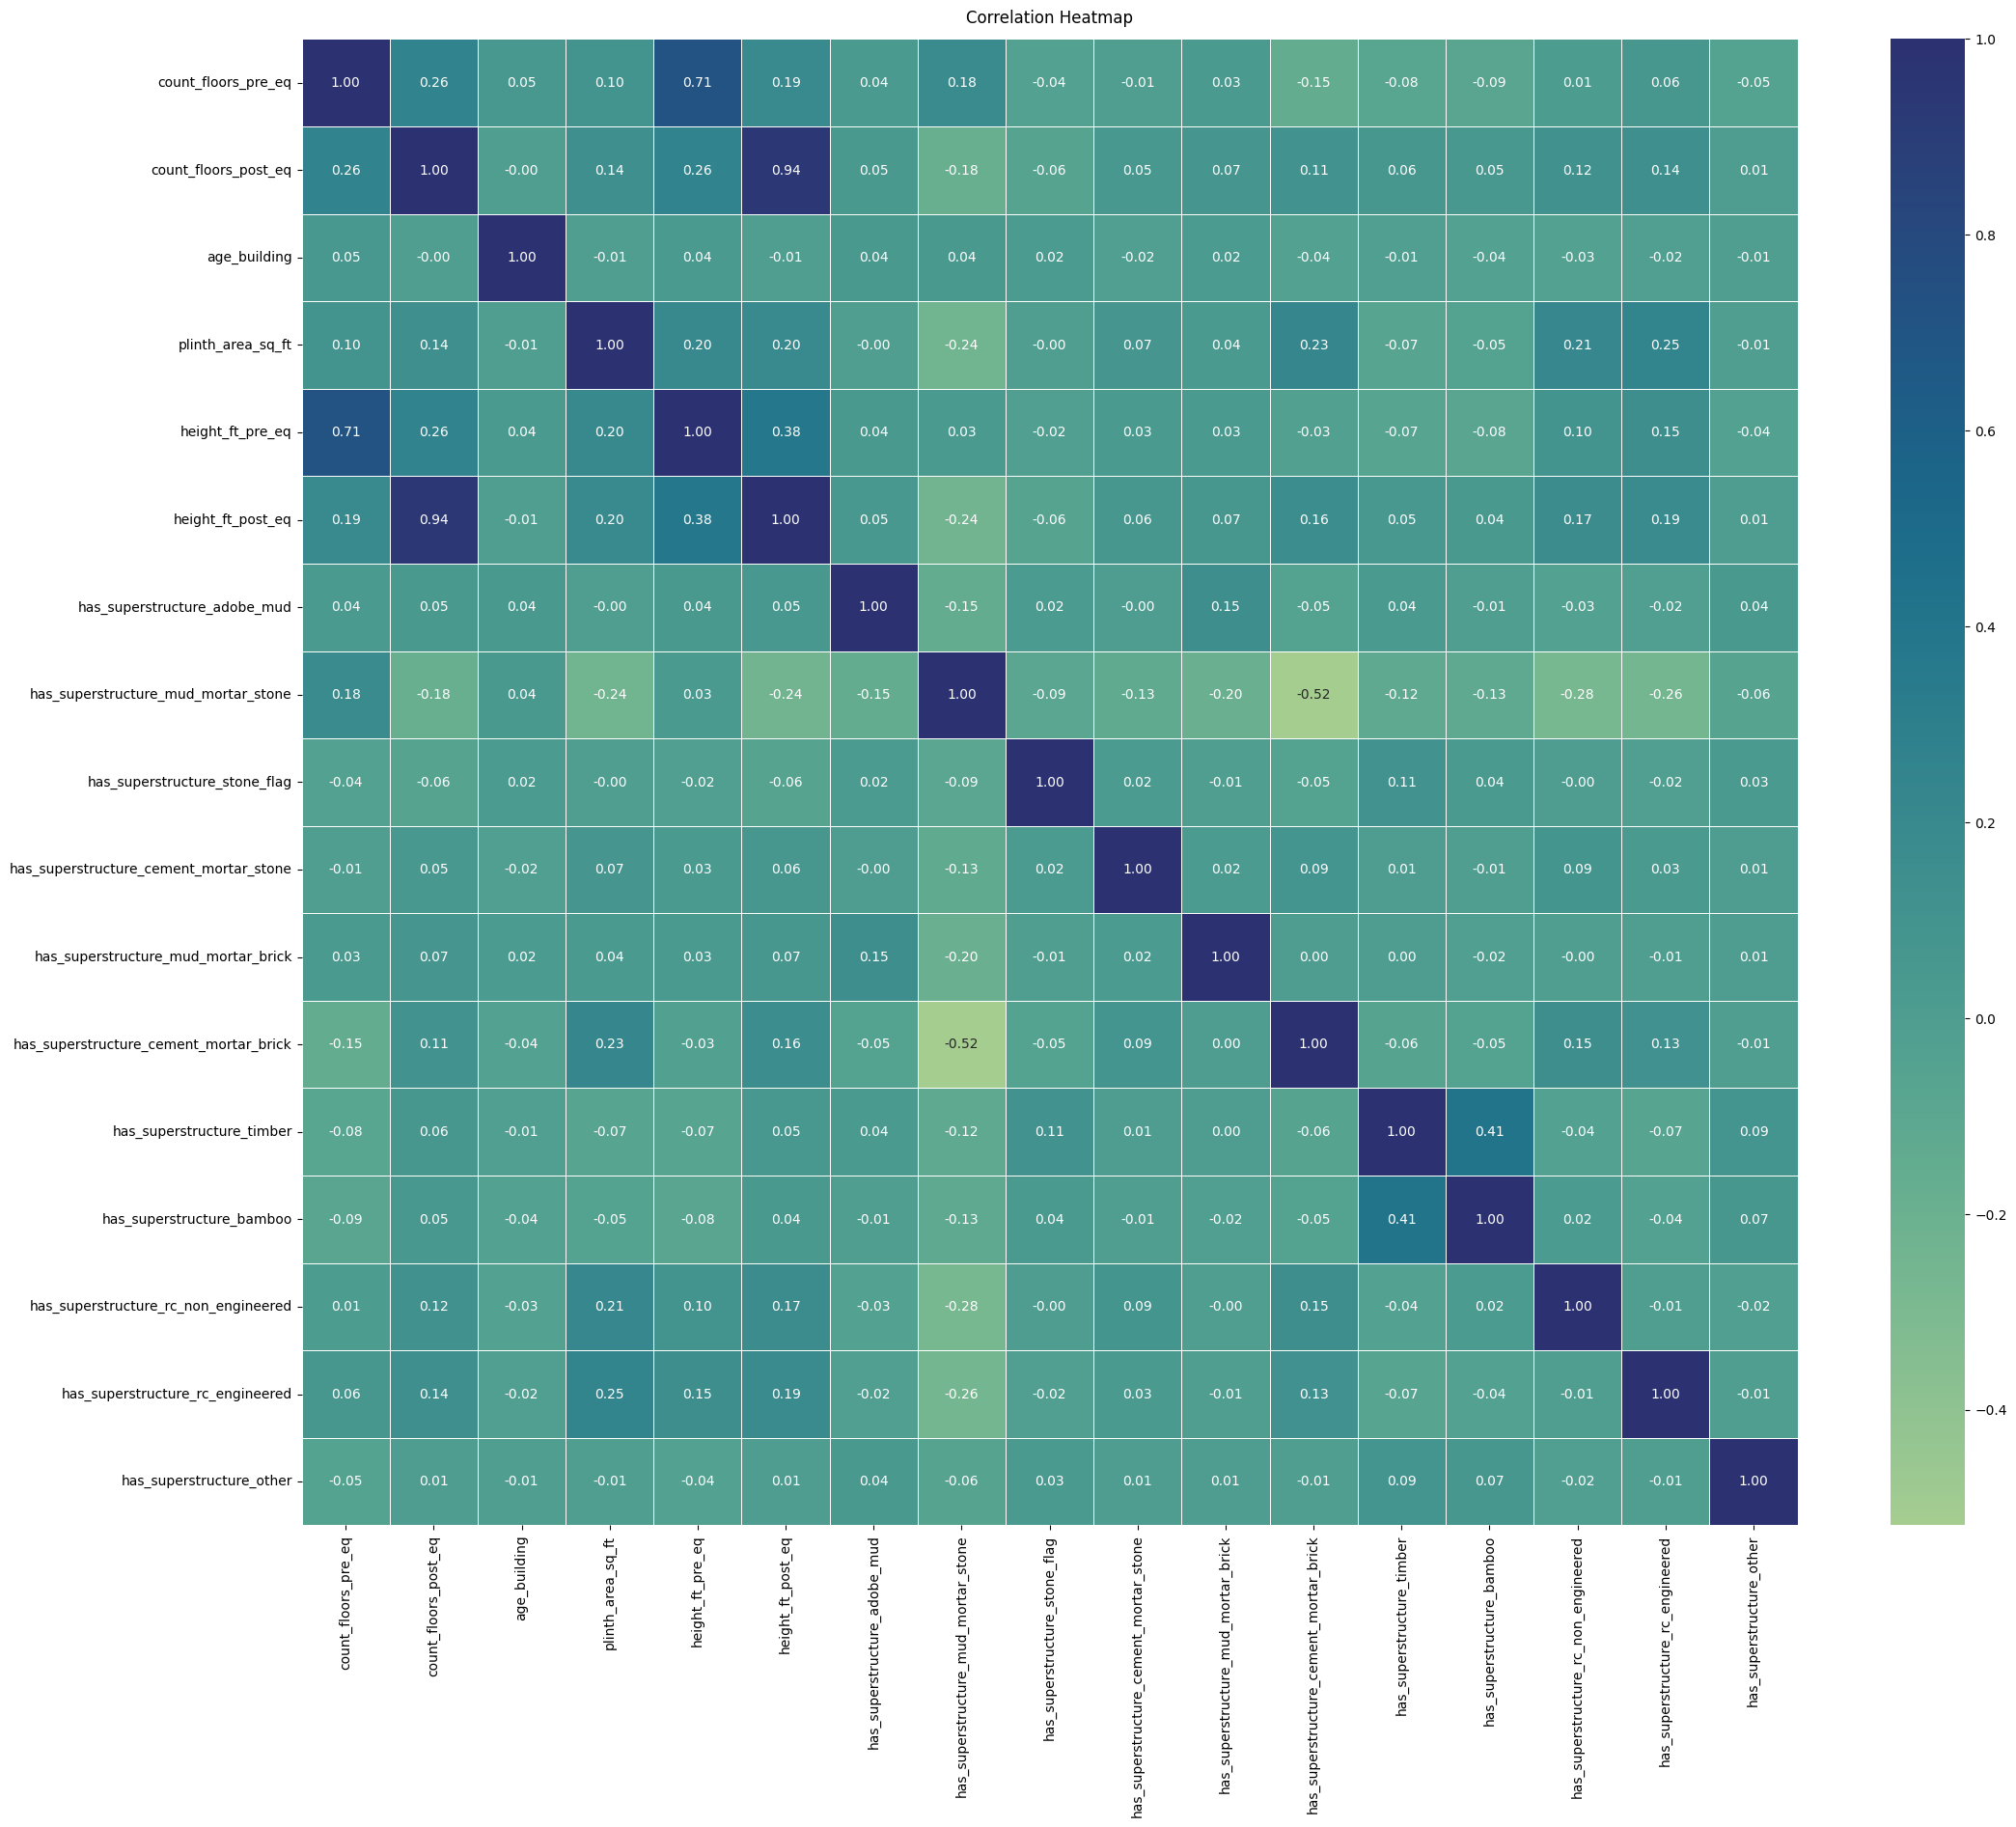

In [ ]:
plt.figure(figsize=(25, 20))

heatmap = sns.heatmap(df_estructura.corr(), cmap="crest", annot=True, linewidth=.5, fmt='.2f')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Del análisis del heatmap no se observan relaciones fuertes (de un coeficiente de relación mayor al 0.5), salvo la que era de esperar, del conteo de pisos pre y post terremoto con respecto a la altura de las edificaciones (relación lineal clara de proporcionalidad directa que indica que a mayor numero de pisos, mayor sera la altura del edificio).
Si se puede observar del heatmap, que las edificaciones con cemento reforzado como material fundacional, son los que mayor area de platea en pies cuadrados tienen y que fueron las que mayor cantidad de pisos en pie conservaron luego del terremoto.
También se pueden observar que materiales fueron empleados de manera conjunta en la construcción, siendo la asociación más notoria la que se establece entre el bambú y la madera.

Dado que fallecieron 9000 personas y millones se quedaron sin hogar, al hacer un análisis univariado del grado de daño sufrido por las edificaciones, es de esperar que la gran mayoría haya sufrido un daño severo (grados 5 y 4)

Text(0, 0.5, 'Frecuencia absoluta')

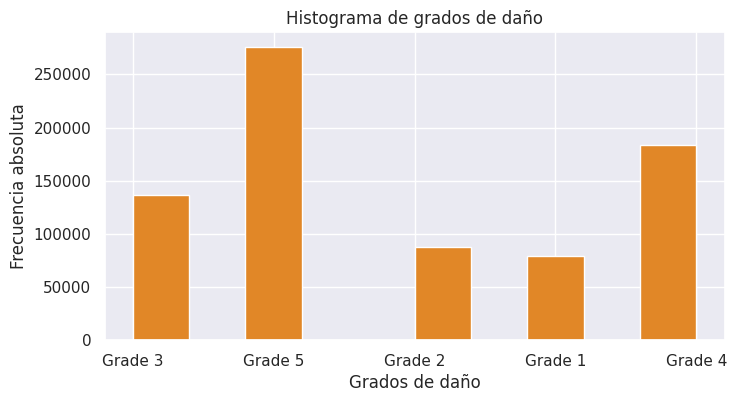

In [ ]:
#Analizando la ocurrencia de grados de daño en un histograma de frecuencias absolutas (ánalisis univariado)
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_estructura['damage_grade'], bins=10, color= '#E18727')
ax.set_title('Histograma de grados de daño')
ax.set_xlabel('Grados de daño')
ax.set_ylabel('Frecuencia absoluta')

Como era de esperarse, se observa que la mayor parte de los edificios sufrieron un grado severo de daño (5). A continuación, se intentará establecer si existe una relación entre el grado de daño y las diferentes variables en la construcción edilicia de las que se tiene dato.
Se plantea como hipotesis que, debido a la gran proporción de daños severos sufridos por las edificaciones, haya poca proporción de edificaciones cemento reforzado o materiales similares.

## Análisis del daño de acuerdo al material fundacional

Se plantea como hipotesis que, debido a la gran proporción de daños severos sufridos por las edificaciones, haya poca proporción de edificaciones cemento reforzado o materiales similares.

In [ ]:
#Analizando el número de edificios de acuerdo a su material fundacional
ax.hist(df_estructura['foundation_type'], bins=10)
ax.set_title('Número de edificios por material fundacional')
ax.set_xlabel('Tipo de material')
ax.set_ylabel('Frecuencia absoluta')

Text(28.0, 0.5, 'Frecuencia absoluta')

Se observa que la mayoría de los edificios estaban hechos de una mezcla de fango con cemento y piedras/ladrillos

La información referida al material fundacional está en una sola columna (foundation type) pero también se encuentra desagragregada en una mayor cantidad de categorias en datos de tipo binario siendo 1= lo tiene y 0= no lo tiene

In [ ]:
#Analizando el grado de daño sufrido por las edificaciones en base al material fundacional de las mismas (utilizando los datos binarios)
df_daño_material = df_estructura.groupby(["damage_grade"]).sum().reset_index()[["damage_grade","has_superstructure_adobe_mud","has_superstructure_mud_mortar_stone", "has_superstructure_stone_flag","has_superstructure_cement_mortar_stone","has_superstructure_mud_mortar_brick","has_superstructure_cement_mortar_brick","has_superstructure_timber","has_superstructure_bamboo","has_superstructure_rc_non_engineered","has_superstructure_rc_engineered","has_superstructure_other"]]
df_daño_material

<ipython-input-18-421a16bda550>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daño_material = df_estructura.groupby(["damage_grade"]).sum().reset_index()[["damage_grade","has_superstructure_adobe_mud","has_superstructure_mud_mortar_stone", "has_superstructure_stone_flag","has_superstructure_cement_mortar_stone","has_superstructure_mud_mortar_brick","has_superstructure_cement_mortar_brick","has_superstructure_timber","has_superstructure_bamboo","has_superstructure_rc_non_engineered","has_superstructure_rc_engineered","has_superstructure_other"]]


,damage_grade,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,Grade 1,1490,22594,553,2398,1271,23840,26748,9849,11876,8500,2229
1,Grade 2,3562,52098,2633,2392,2706,16476,27875,10977,7875,2822,1092
2,Grade 3,8053,109159,3854,2768,4974,8995,40430,13897,4611,903,1867
3,Grade 4,9852,165715,6060,2496,5434,3282,46063,13826,2389,152,1988
4,Grade 5,9357,260314,13666,1999,3114,1917,56091,12787,3576,111,1989


Dado el aspecto binario de los datos, siendo 1= lo tiene y 0= no lo tiene, al hacer la suma, una mayor valor indica posesión de dicho material.

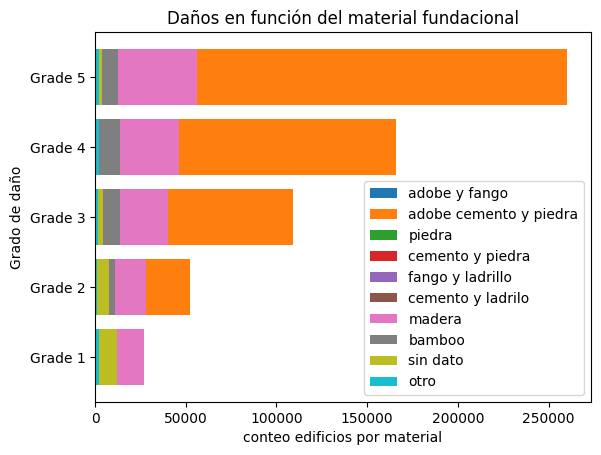

In [ ]:
fig, ax = plt.subplots()
ax.barh( df_daño_material['damage_grade'],df_daño_material['has_superstructure_adobe_mud'], label ='adobe y fango')
ax.barh(df_daño_material['damage_grade'], df_daño_material['has_superstructure_mud_mortar_stone'], label ='adobe cemento y piedra')
ax.barh(df_daño_material['damage_grade'],df_daño_material['has_superstructure_stone_flag'], label ='piedra')
ax.barh(df_daño_material['damage_grade'], df_daño_material['has_superstructure_cement_mortar_stone'], label ='cemento y piedra')
ax.barh(df_daño_material['damage_grade'], df_daño_material['has_superstructure_mud_mortar_brick'], label ='fango y ladrillo')
ax.barh(df_daño_material['damage_grade'], df_daño_material['has_superstructure_cement_mortar_brick'], label ='cemento y ladrilo')
ax.barh(df_daño_material['damage_grade'], df_daño_material['has_superstructure_timber'], label ='madera')
ax.barh(df_daño_material['damage_grade'],df_daño_material['has_superstructure_bamboo'], label ='bamboo')
ax.barh(df_daño_material['damage_grade'], df_daño_material['has_superstructure_rc_non_engineered'], label ='sin dato')
ax.barh(df_daño_material['damage_grade'],df_daño_material['has_superstructure_other'], label ='otro')

ax.set_xlabel("conteo edificios por material")
ax.set_ylabel('Grado de daño')
ax.set_title('Daños en función del material fundacional')
ax.legend()

Se observa que los edificios que mayor daño sufrieron, son los construidos con adobe y piedra y con madera

Los datos asociados al material fundacional también están agrupados en una única columna. Se hará un EDA con estos datos para ver si hay diferencias significativas en los resultados

In [ ]:
#Analizando el grado de daño sufrido por las edificaciones en base al material fundacional de las mismas, segundo método
df_daño_material2 = df_estructura.groupby(['foundation_type','damage_grade']).size().reset_index(name='count')
df_daño_material2

,foundation_type,damage_grade,count
0,Bamboo/Timber,Grade 1,17201
1,Bamboo/Timber,Grade 2,13357
2,Bamboo/Timber,Grade 3,13244
3,Bamboo/Timber,Grade 4,8368
4,Bamboo/Timber,Grade 5,5302
5,Cement-Stone/Brick,Grade 1,11642
6,Cement-Stone/Brick,Grade 2,8847
7,Cement-Stone/Brick,Grade 3,7104
8,Cement-Stone/Brick,Grade 4,5621
9,Cement-Stone/Brick,Grade 5,6031


In [ ]:
df_daño_material2= df_daño_material2.set_index(['foundation_type', 'damage_grade'])

In [ ]:
df_daño_material2

count
foundation_type        damage_grade        
Bamboo/Timber          Grade 1        17201
                       Grade 2        13357
                       Grade 3        13244
                       Grade 4         8368
                       Grade 5         5302
Cement-Stone/Brick     Grade 1        11642
                       Grade 2         8847
                       Grade 3         7104
                       Grade 4         5621
                       Grade 5         6031
Mud mortar-Stone/Brick Grade 1        29484
                       Grade 2        56044
                       Grade 3       112442
                       Grade 4       168458
                       Grade 5       262277
Other                  Grade 1         1364
                       Grade 2          405
                       Grade 3          459
                       Grade 4          691
                       Grade 5         1633
RC                     Grade 1        19124
                       Grade 2         8604
                       Grade 3         3163
                       Grade 4          706
                       Grade 5          523

In [ ]:
#calculando la proporción del grado de daño
df_daño_material2 = df_daño_material2.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

<ipython-input-23-7e83af91007b>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_daño_material2 = df_daño_material2.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


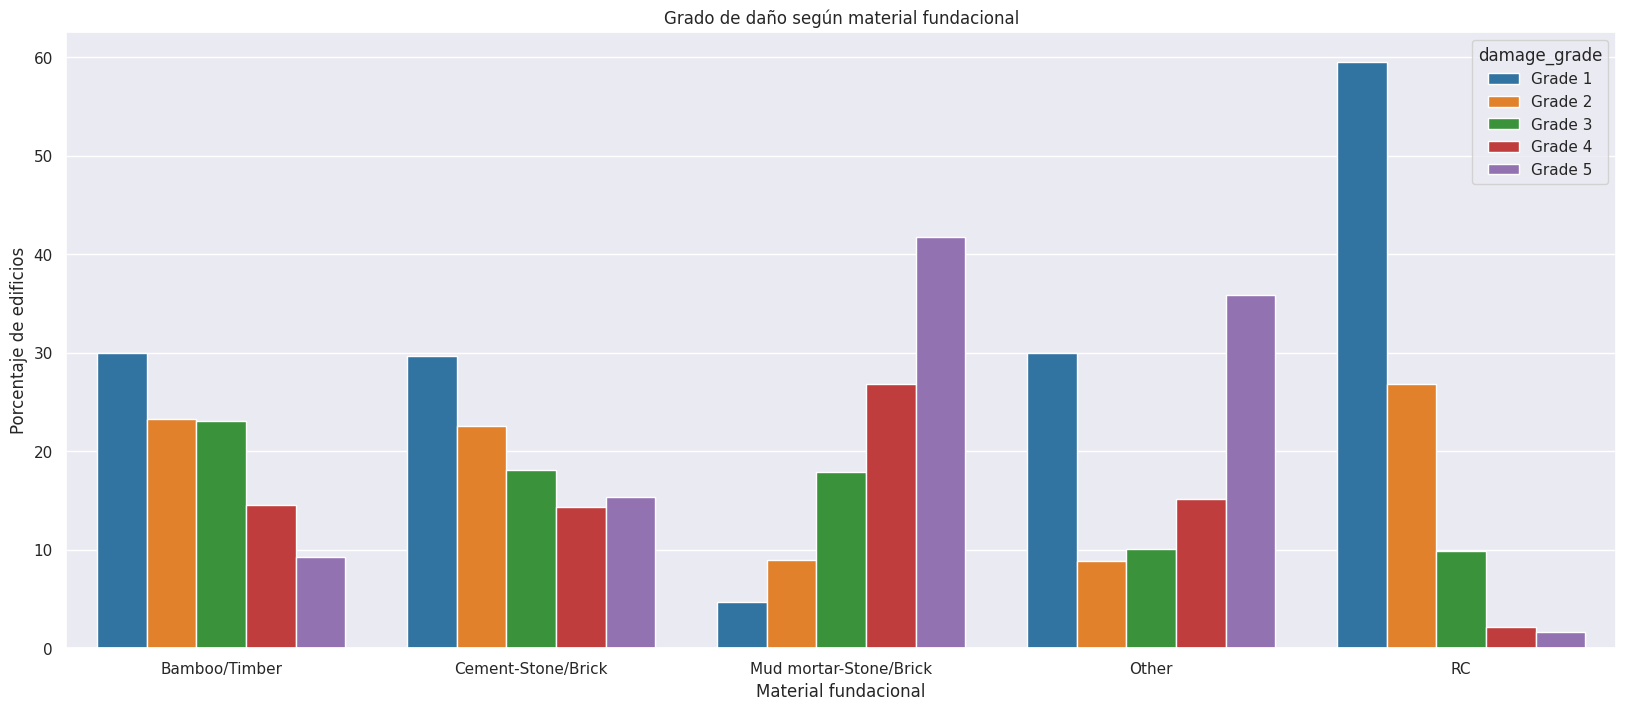

In [ ]:
#Graficando según segundo método

sns.barplot(data=df_daño_material2 , x='foundation_type', y= "count", hue = "damage_grade")
sns.set(rc = {'figure.figsize':(20,8)})
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
sns.set_palette ('tab10')
plt.title("Grado de daño según material fundacional")
plt.xlabel("Material fundacional")
plt.ylabel("Porcentaje de edificios")
plt.show()

Analisis similar, las edificaciones menos sismorresistentes fueron las hechas con una mezcla de fango piedra y cemento (como material cementante) pero se incluye al ladrillo.
En cambio, las edificaciones mas sismorresistentes fueron las que contaban con cemento reforzado.

##**Análisis de acuerdo al tipo de techo**

Text(0, 0.5, 'Frecuencia absoluta')

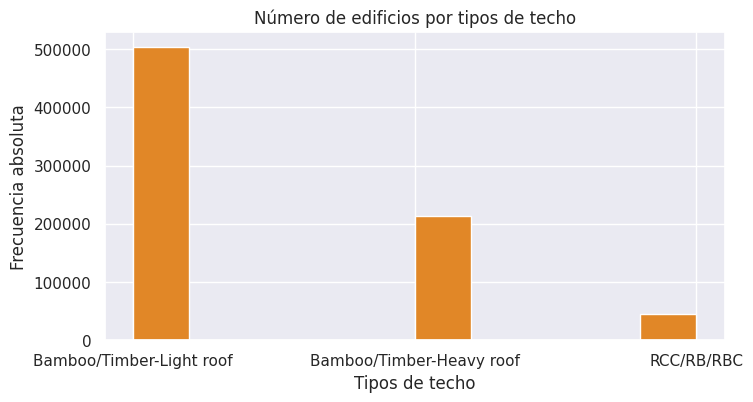

In [ ]:
#Analizando el número de edificios por tipo de techo
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_estructura['roof_type'], bins=10, color='#E18727')
ax.set_title('Número de edificios por tipos de techo')
ax.set_xlabel('Tipos de techo')
ax.set_ylabel('Frecuencia absoluta')

La mayor parte de las edificaciones poseían techos de bamboo y madera

In [ ]:
#Analizando el grado de daño sufrido por las edificaciones en base al tipo de techo
df_daño_techo = df_estructura.groupby(['roof_type','damage_grade']).size().reset_index(name='count')
df_daño_techo

,roof_type,damage_grade,count
0,Bamboo/Timber-Heavy roof,Grade 1,13498
1,Bamboo/Timber-Heavy roof,Grade 2,22394
2,Bamboo/Timber-Heavy roof,Grade 3,41267
3,Bamboo/Timber-Heavy roof,Grade 4,51757
4,Bamboo/Timber-Heavy roof,Grade 5,84858
5,Bamboo/Timber-Light roof,Grade 1,40989
6,Bamboo/Timber-Light roof,Grade 2,52552
7,Bamboo/Timber-Light roof,Grade 3,89821
8,Bamboo/Timber-Light roof,Grade 4,130513
9,Bamboo/Timber-Light roof,Grade 5,189861


In [ ]:
df_daño_techo= df_daño_techo.set_index(['roof_type', 'damage_grade'])
df_daño_techo

count
roof_type                damage_grade        
Bamboo/Timber-Heavy roof Grade 1        13498
                         Grade 2        22394
                         Grade 3        41267
                         Grade 4        51757
                         Grade 5        84858
Bamboo/Timber-Light roof Grade 1        40989
                         Grade 2        52552
                         Grade 3        89821
                         Grade 4       130513
                         Grade 5       189861
RCC/RB/RBC               Grade 1        24328
                         Grade 2        12311
                         Grade 3         5324
                         Grade 4         1574
                         Grade 5         1047

In [ ]:
#calculando la proporción del grado de daño
df_daño_techo = df_daño_techo.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

<ipython-input-43-4ec74218e380>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_daño_techo = df_daño_techo.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


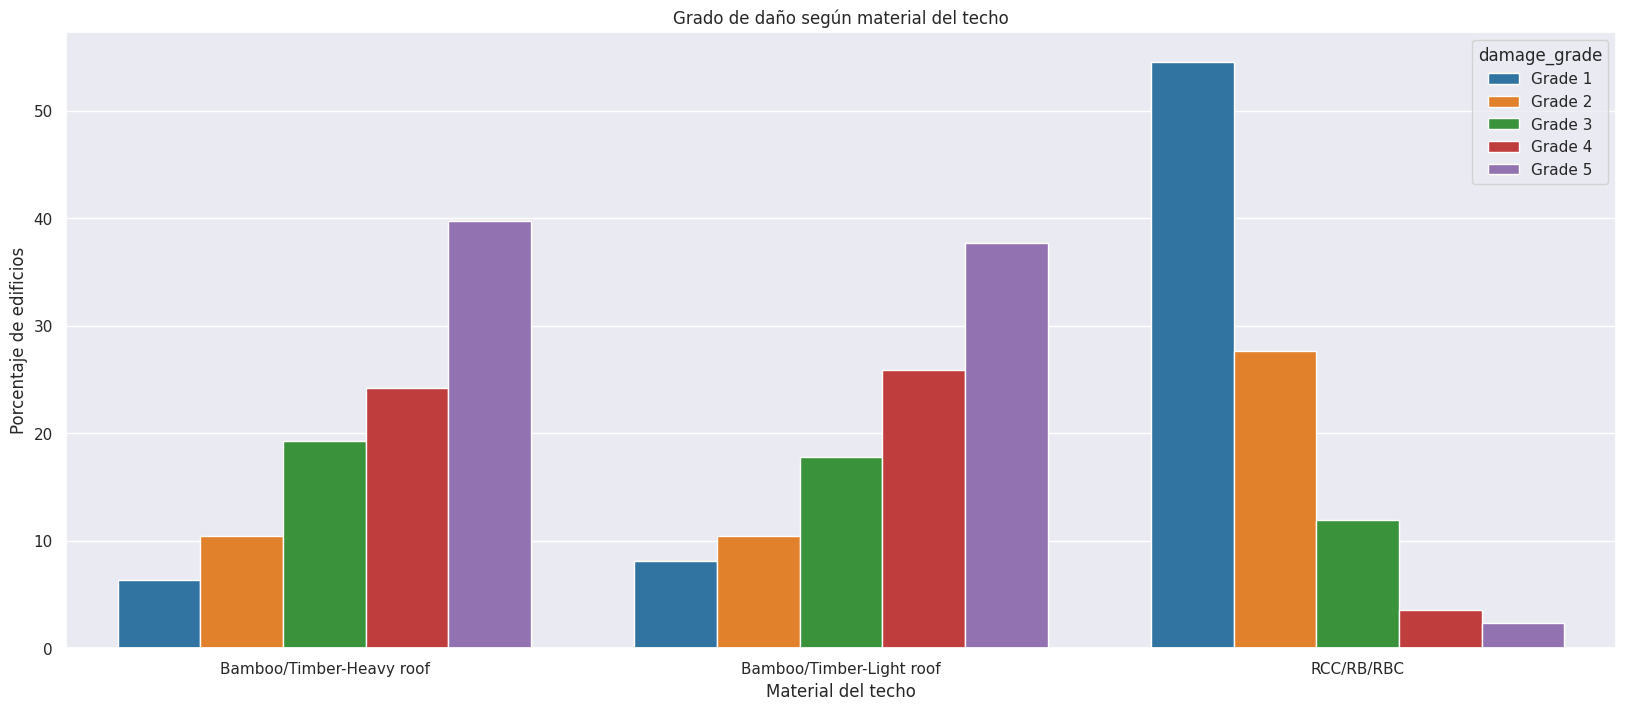

In [ ]:
sns.barplot(data= df_daño_techo , x='roof_type', y= "count", hue = "damage_grade")
sns.set(rc = {'figure.figsize':(20,8)})
sns.set_palette ('tab10')
plt.title("Grado de daño según material del techo")
plt.xlabel("Material del techo")
plt.ylabel("Porcentaje de edificios")
plt.show()

Se observan mayores daños en los edificios con techos de bamboo/madera independientemente de si eran del tipo liviano o ligero. Las edificaciones con techos de cemento reforzado y sus derivados fueron las mas sismoresistentes

##**Análisis según la pendiente del terreno**

En este caso, se plantea como hipótesis de que proporcionalmente hayan ocurrido daños mas severos en aquellos edificaciones asentadas sobre superficies con pendientes naturales más pronunciadas.

Text(0, 0.5, 'Frecuencia absoluta')

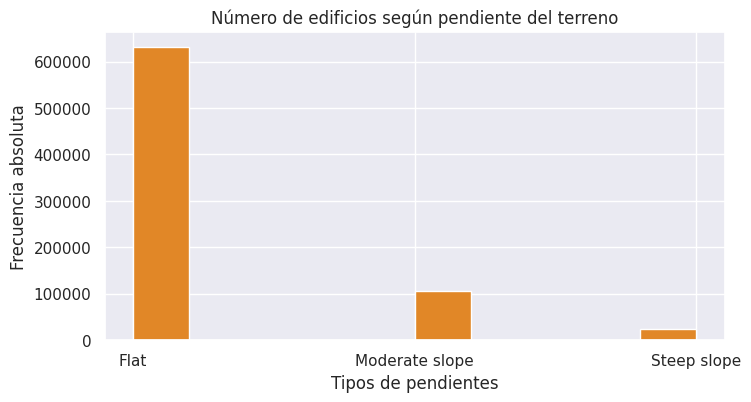

In [ ]:
#Analizando el número de edificios de acuerdo a la pendiente del terreno sobre el que estaban asentados
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_estructura['land_surface_condition'], bins=10,  color='#E18727')
ax.set_title('Número de edificios según pendiente del terreno')
ax.set_xlabel('Tipos de pendientes')
ax.set_ylabel('Frecuencia absoluta')

La mayor parte de las edificaciones estaban sobre superficies llanas

In [ ]:
#Analizando el grado de daño sufrido por las edificaciones según el terreno
df_daño_superficie = df_estructura.groupby(['land_surface_condition','damage_grade']).size().reset_index(name='count')
df_daño_superficie

,land_surface_condition,damage_grade,count
0,Flat,Grade 1,68849
1,Flat,Grade 2,73166
2,Flat,Grade 3,111244
3,Flat,Grade 4,148615
4,Flat,Grade 5,229789
5,Moderate slope,Grade 1,8063
6,Moderate slope,Grade 2,11813
7,Moderate slope,Grade 3,20624
8,Moderate slope,Grade 4,28694
9,Moderate slope,Grade 5,36446


In [ ]:
df_daño_superficie= df_daño_superficie.set_index(['land_surface_condition', 'damage_grade'])

In [ ]:
#calculando la proporción del grado de daño
df_daño_superficie = df_daño_superficie.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

<ipython-input-62-1a8d0cfe2846>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_daño_superficie = df_daño_superficie.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


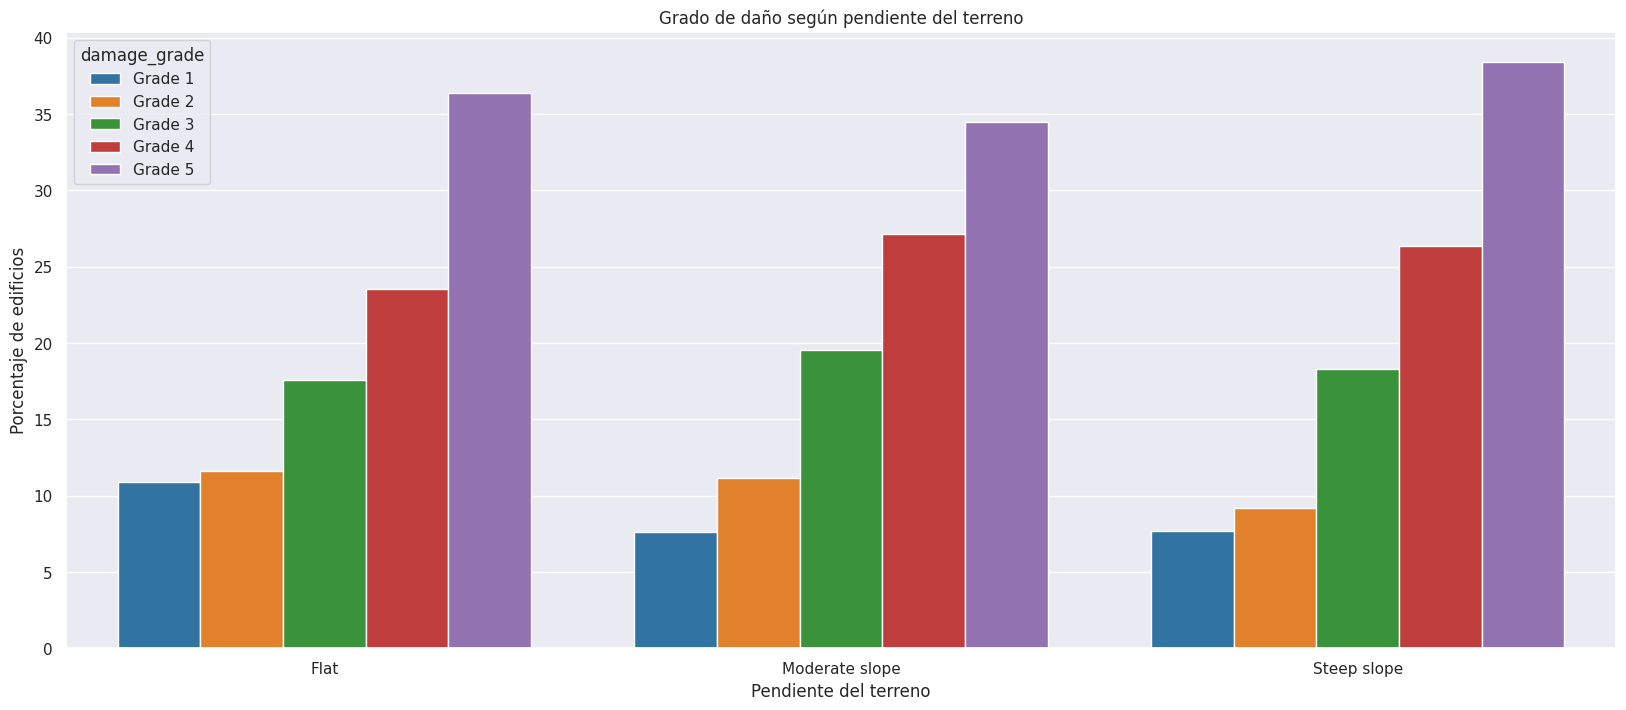

In [ ]:
sns.barplot(data=df_daño_superficie , x='land_surface_condition', y= "count", hue = "damage_grade")
sns.set(rc = {'figure.figsize':(20,8)})
sns.set_palette ('tab10')
plt.title("Grado de daño según pendiente del terreno")
plt.xlabel("Pendiente del terreno")
plt.ylabel("Porcentaje de edificios")
plt.show()

Se observa que en proporción las construcciones sobre pendientes moderadas a pronunciadas fueron las que daño mas severo sufrieron.

##**Análisis según el tipo de piso**

Se espera que las edificaciones más sismoresistentes sean las que tienen pisos de cemento reforzado.

Text(0, 0.5, 'Frecuencia absoluta')

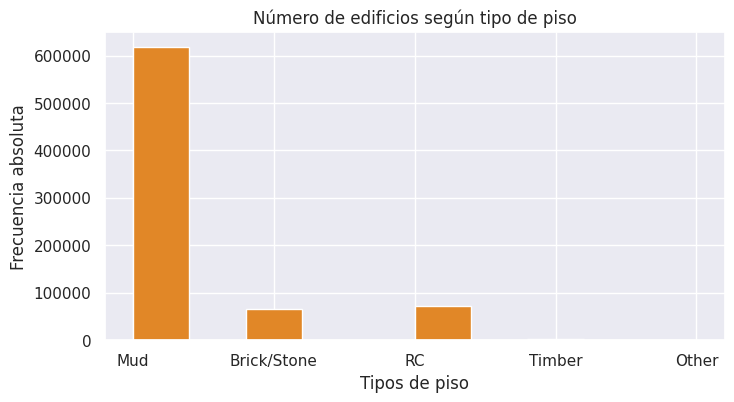

In [ ]:
#Analizando el número de edificios de acuerdo al tipo de piso
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_estructura['ground_floor_type'], bins=10,  color='#E18727')
ax.set_title('Número de edificios según tipo de piso')
ax.set_xlabel('Tipos de piso')
ax.set_ylabel('Frecuencia absoluta')

In [ ]:
#Analizando el grado de daño sufrido por las edificaciones según el tipo de piso
df_daño_piso = df_estructura.groupby(['ground_floor_type','damage_grade']).size().reset_index(name='count')
df_daño_piso

,ground_floor_type,damage_grade,count
0,Brick/Stone,Grade 1,5906
1,Brick/Stone,Grade 2,6721
2,Brick/Stone,Grade 3,10833
3,Brick/Stone,Grade 4,16592
4,Brick/Stone,Grade 5,26041
5,Mud,Grade 1,38073
6,Mud,Grade 2,59487
7,Mud,Grade 3,114001
8,Mud,Grade 4,161466
9,Mud,Grade 5,245178


In [ ]:
df_daño_piso= df_daño_piso.set_index(['ground_floor_type', 'damage_grade'])
df_daño_piso

count
ground_floor_type damage_grade        
Brick/Stone       Grade 1         5906
                  Grade 2         6721
                  Grade 3        10833
                  Grade 4        16592
                  Grade 5        26041
Mud               Grade 1        38073
                  Grade 2        59487
                  Grade 3       114001
                  Grade 4       161466
                  Grade 5       245178
Other             Grade 1          291
                  Grade 2          200
                  Grade 3          239
                  Grade 4          176
                  Grade 5          147
RC                Grade 1        33862
                  Grade 2        20173
                  Grade 3        10813
                  Grade 4         4864
                  Grade 5         3437
Timber            Grade 1          683
                  Grade 2          676
                  Grade 3          526
                  Grade 4          746
                  Grade 5          963

In [ ]:
df_daño_piso = df_daño_piso.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

<ipython-input-68-48f41304cc30>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_daño_piso = df_daño_piso.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


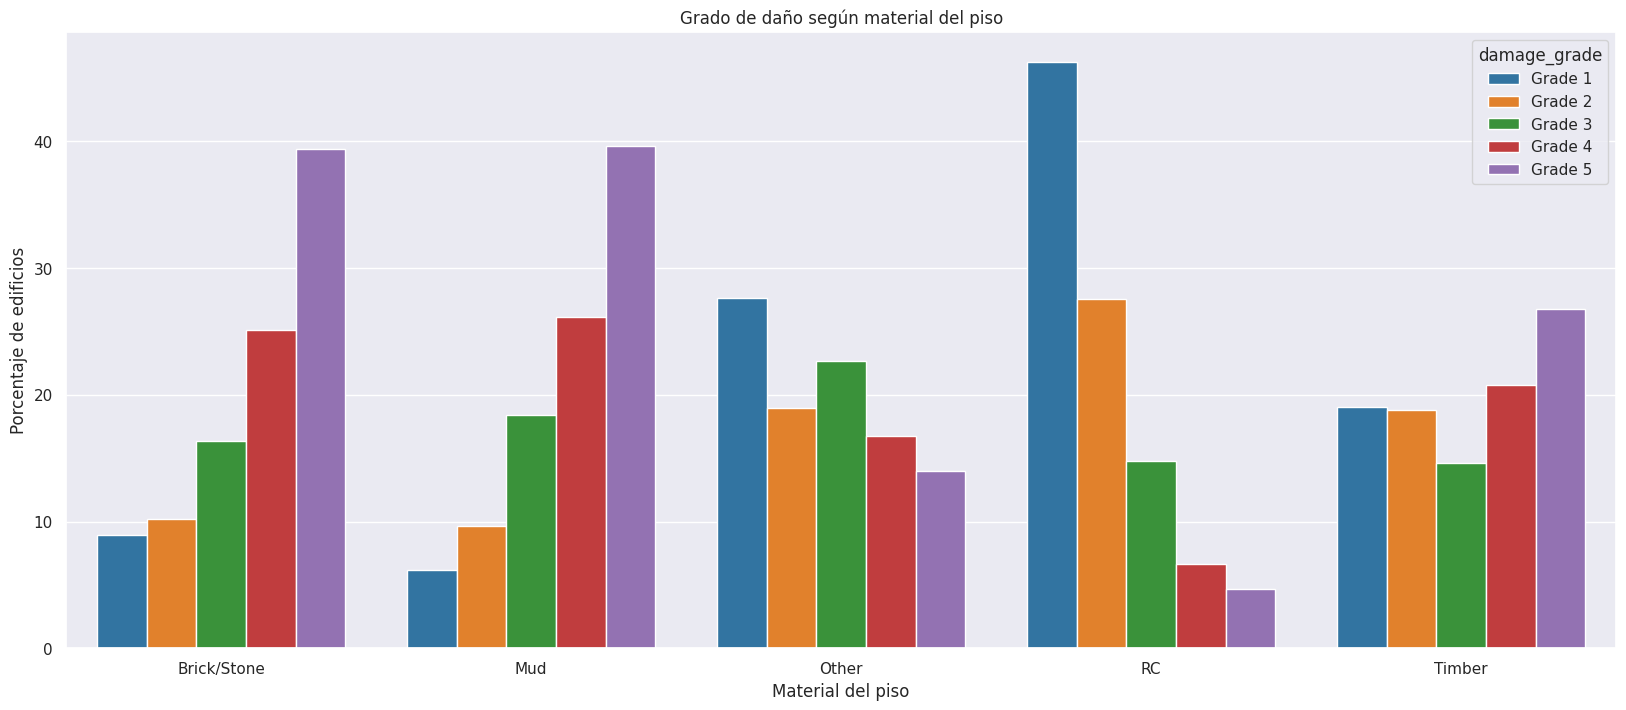

In [ ]:
sns.barplot(data=df_daño_piso , x='ground_floor_type', y= "count", hue = "damage_grade")
sns.set(rc = {'figure.figsize':(20,8)})
sns.set_palette ('tab10')
plt.title("Grado de daño según material del piso")
plt.xlabel("Material del piso")
plt.ylabel("Porcentaje de edificios")
plt.show()

Mayor proporción de daños severos en edificios con piso de fango y ladrillo/piedra

In [ ]:
#Analizando el conteo de pisos pre y post terremoto en base a su material
df_pisos_material = df_estructura.groupby(["ground_floor_type"]).sum().reset_index()[["ground_floor_type","count_floors_pre_eq","count_floors_post_eq"]]
df_pisos_material

<ipython-input-79-a7aea2ab044a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pisos_material = df_estructura.groupby(["ground_floor_type"]).sum().reset_index()[["ground_floor_type","count_floors_pre_eq","count_floors_post_eq"]]


,ground_floor_type,count_floors_pre_eq,count_floors_post_eq
0,Brick/Stone,137605,78010
1,Mud,1304882,737428
2,Other,1907,1551
3,RC,140743,132745
4,Timber,5953,4446


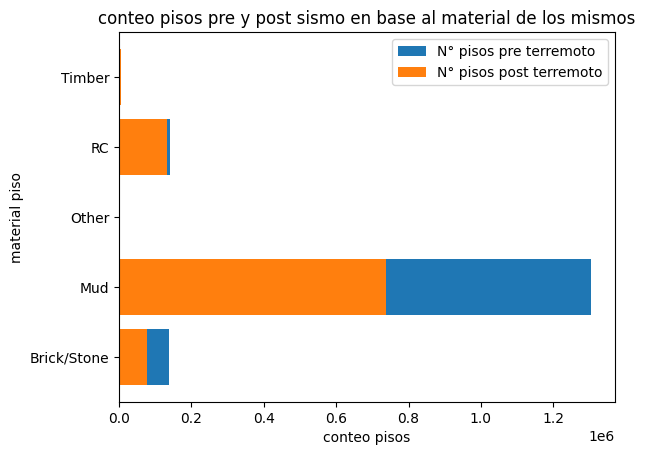

In [ ]:
#Analizando el conteo de pisos pre y post terremoto en base al material de los pisos
fig, ax = plt.subplots()
ax.barh(df_pisos_material['ground_floor_type'], df_pisos_material['count_floors_pre_eq'], label ='N° pisos pre terremoto')
ax.barh(df_pisos_material['ground_floor_type'], df_pisos_material['count_floors_post_eq'],label ='N° pisos post terremoto')

ax.set_xlabel("conteo pisos")
ax.set_ylabel('material piso')
ax.set_title('conteo pisos pre y post sismo en base al material de los mismos')
ax.legend()

Se observa que los pisos más sismoresistentes fueron los hechos de cemento reforzado

##**Análisis según la configuración/ forma en el plano**

Text(0, 0.5, 'Frecuencia absoluta')

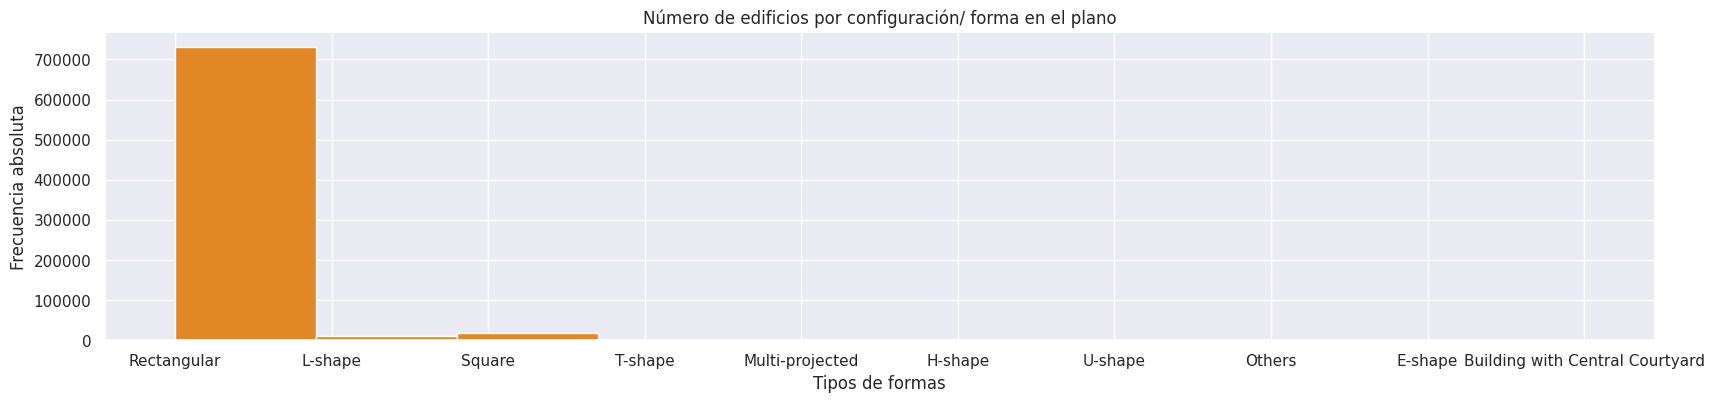

In [ ]:
#Analizando el número de edificios de acuerdo a sus formas
fig, ax = plt.subplots(figsize=(20, 4))
ax.hist(df_estructura['plan_configuration'], bins=10,  color='#E18727')
ax.set_title('Número de edificios por configuración/ forma en el plano')
ax.set_xlabel('Tipos de formas')
ax.set_ylabel('Frecuencia absoluta')

La mayoría de los edificios tenían una configuración rectangular

In [ ]:
#Analizando el grado de daño sufrido por las edificaciones según la geometría de la construcción
df_daño_forma = df_estructura.groupby(['plan_configuration','damage_grade']).size().reset_index(name='count')


In [ ]:
df_daño_forma= df_daño_forma.set_index(['plan_configuration', 'damage_grade'])
df_daño_forma

count
plan_configuration              damage_grade        
Building with Central Courtyard Grade 1           32
                                Grade 2           32
                                Grade 3           16
                                Grade 4            9
                                Grade 5            9
E-shape                         Grade 1           18
                                Grade 2           25
                                Grade 3           29
                                Grade 4           29
                                Grade 5           39
H-shape                         Grade 1            9
                                Grade 2           14
                                Grade 3           17
                                Grade 4           23
                                Grade 5           17
L-shape                         Grade 1         2781
                                Grade 2         2209
                                Grade 3         2096
                                Grade 4         1798
                                Grade 5         1195
Multi-projected                 Grade 1          270
                                Grade 2          201
                                Grade 3          253
                                Grade 4          158
                                Grade 5           58
Others                          Grade 1          222
                                Grade 2           64
                                Grade 3          121
                                Grade 4           61
                                Grade 5           50
Rectangular                     Grade 1        72627
                                Grade 2        82507
                                Grade 3       131216
                                Grade 4       178268
                                Grade 5       266628
Square                          Grade 1         2572
                                Grade 2         1888
                                Grade 3         2348
                                Grade 4         3236
                                Grade 5         7532
T-shape                         Grade 1          170
                                Grade 2          215
                                Grade 3          221
                                Grade 4          186
                                Grade 5          177
U-shape                         Grade 1          114
                                Grade 2          102
                                Grade 3           95
                                Grade 4           76
                                Grade 5           61

In [ ]:
df_daño_forma = df_daño_forma.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

<ipython-input-73-7a065b54039d>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_daño_forma = df_daño_forma.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


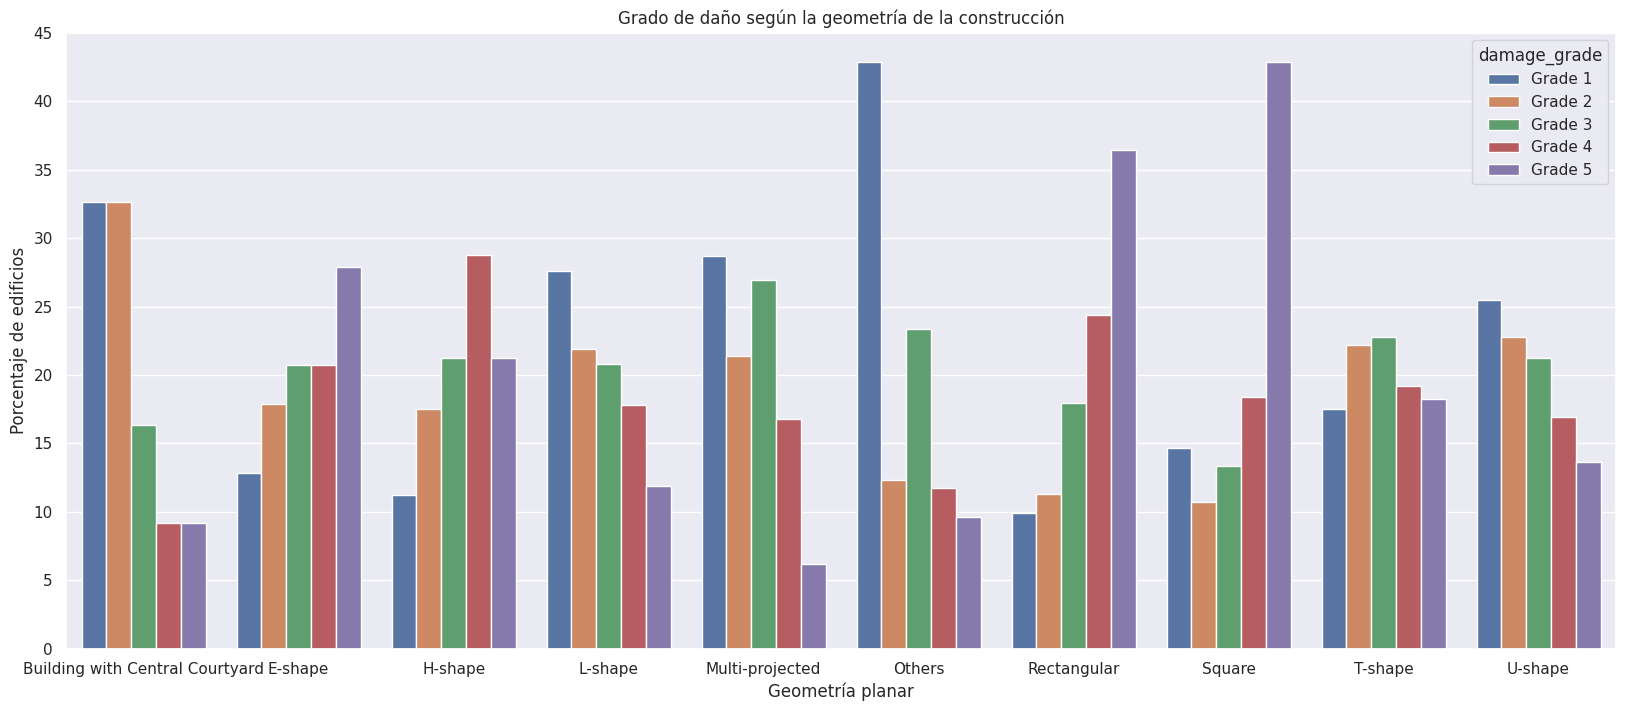

In [ ]:
sns.barplot(data=df_daño_forma , x='plan_configuration', y= "count", hue = "damage_grade")
sns.set(rc = {'figure.figsize':(20,8)})
sns.set_palette('tab10')
plt.title("Grado de daño según la geometría de la construcción")
plt.xlabel("Geometría planar")
plt.ylabel("Porcentaje de edificios")
plt.show()

##**Conclusiones preliminares por medio de EDA**

Se observa que la mayor parte de los edificios sufrieron un grado severo de daño (5).

Se observa que la mayoría de los edificios estaban hechos de fango y piedra /ladrillo, y que los que mayor daño sufrieron, fueron los construidos con adobe y piedra. En cambio, las edificaciones mas sismorresistentes fueron las que contaban con cemento reforzado

La mayor parte de las edificaciones poseían techos de bamboo y madera, siendo los edificios con este material de techo los que mayor daño sufrieron.

La mayor parte de las edificaciones estaban realizadas sobre superficies llanas. Gráficamente no se observa una gran incidencia de la pendiente, aunque si se registraron mayores daños en las  las construcciones hechas sobre pendientes moderadas a pronunciadas.

La mayor parte de los pisos estaban hechos de fango, y la mayor proporción de daños severos se vio expresada en pisos de dicho material y de ladrillo/piedra.


Las  edificaciones que mayores daños sufrieron fueron las de geometría rectangular y cuadrada, y las que menos, las construcciones multiproyectadas, y en forma de L.

#**Aplicación de ML**

*   Objetivo: Se intentará formular un modelo que explique y prediga el nivel de daño que pudiera sufrir una edificación en base a su material fundacional, número de pisos pre y post sismo, area de la edificación, altura de la edificación pre y post sismo, edad de los edificios.
*  Tipo de aprendizaje: Supervisado, se sabe la variable respuesta
*  Subtipo: de clasificación, la variable respuesta es categórica.





A continuación, se trabajará con los datos para poder aplicar ML. Se realizarán procesos de one hot encoding sobre variables categóricas, normalización y PCA.

In [ ]:
#Seleccionando variables categóricas del DF
df_estructura_cat=  df_estructura [['land_surface_condition', 'foundation_type','roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration']]
df_estructura_cat.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration
building_id,,,,,,,
120101000011,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular
120101000021,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular
120101000031,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular
120101000041,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular
120101000051,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular


In [ ]:
# one hot encoding en variables categoricas
df_estructura_encoded = pd.get_dummies(df_estructura_cat)
df_estructura_encoded

,land_surface_condition_Flat,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,foundation_type_Bamboo/Timber,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,roof_type_Bamboo/Timber-Heavy roof,roof_type_Bamboo/Timber-Light roof,...,plan_configuration_Building with Central Courtyard,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
120101000021,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
120101000031,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
120101000041,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
120101000051,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366709001231,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
366709001241,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
366709001251,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Seleccionando variables numéricas del DF
df_estructura_num = df_estructura[['age_building','count_floors_pre_eq','count_floors_post_eq', 'plinth_area_sq_ft','height_ft_pre_eq', 'height_ft_post_eq', "has_superstructure_adobe_mud","has_superstructure_mud_mortar_stone", "has_superstructure_stone_flag","has_superstructure_cement_mortar_stone","has_superstructure_mud_mortar_brick","has_superstructure_cement_mortar_brick","has_superstructure_timber","has_superstructure_bamboo","has_superstructure_rc_non_engineered","has_superstructure_rc_engineered","has_superstructure_other"]]
df_estructura_num.head()

,age_building,count_floors_pre_eq,count_floors_post_eq,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
building_id,,,,,,,,,,,,,,,,,
120101000011,9,1,1,288,9,9,0,1,0,0,0,0,0,1,0,0,0
120101000021,15,1,1,364,9,9,0,1,0,0,0,0,0,1,0,0,0
120101000031,20,1,1,384,9,9,0,1,0,0,0,0,0,0,0,0,0
120101000041,20,1,1,312,9,9,0,1,0,0,0,0,0,0,0,0,0
120101000051,30,1,1,308,9,9,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
#Uniendo ambos DF's
df_estructura_merge = df_estructura_num.merge(df_estructura_encoded, how='inner', left_index=True, right_index=True)
df_estructura_merge

,age_building,count_floors_pre_eq,count_floors_post_eq,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,...,plan_configuration_Building with Central Courtyard,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,9,1,1,288,9,9,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
120101000021,15,1,1,364,9,9,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
120101000031,20,1,1,384,9,9,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
120101000041,20,1,1,312,9,9,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
120101000051,30,1,1,308,9,9,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366709001231,13,2,2,513,18,18,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
366709001241,60,2,0,165,18,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
366709001251,35,2,0,342,18,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_estructura_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717369 entries, 120101000011 to 366709001271
Data columns (total 51 columns):
 #   Column                                              Non-Null Count   Dtype
---  ------                                              --------------   -----
 0   age_building                                        717369 non-null  int64
 1   count_floors_pre_eq                                 717369 non-null  int64
 2   count_floors_post_eq                                717369 non-null  int64
 3   plinth_area_sq_ft                                   717369 non-null  int64
 4   height_ft_pre_eq                                    717369 non-null  int64
 5   height_ft_post_eq                                   717369 non-null  int64
 6   has_superstructure_adobe_mud                        717369 non-null  int64
 7   has_superstructure_mud_mortar_stone                 717369 non-null  int64
 8   has_superstructure_stone_flag                       717369 non-null

In [ ]:
# Funcion para normalizar de acuerdo con los valores mínimos y máximos de cada variable
def normalize(df):
    result = df.copy()

    for feature_name in df.columns:
        max_val = df[feature_name].max()
        min_val = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_val) / (max_val - min_val)

    return result


# estandarizar las variables numéricas
# Normalizamos llamando a la funcion
df_estructura_merge_norm = normalize(df_estructura_merge)
df_estructura_merge_norm.head()

,age_building,count_floors_pre_eq,count_floors_post_eq,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,...,plan_configuration_Building with Central Courtyard,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,0.009009,0.0,0.111111,0.318248,0.032258,0.090909,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
120101000021,0.015015,0.0,0.111111,0.429197,0.032258,0.090909,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
120101000031,0.020020,0.0,0.111111,0.458394,0.032258,0.090909,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
120101000041,0.020020,0.0,0.111111,0.353285,0.032258,0.090909,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
120101000051,0.030030,0.0,0.111111,0.347445,0.032258,0.090909,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df_estructura_merge_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717369 entries, 120101000011 to 366709001271
Data columns (total 51 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   age_building                                        717369 non-null  float64
 1   count_floors_pre_eq                                 717369 non-null  float64
 2   count_floors_post_eq                                717369 non-null  float64
 3   plinth_area_sq_ft                                   717369 non-null  float64
 4   height_ft_pre_eq                                    717369 non-null  float64
 5   height_ft_post_eq                                   717369 non-null  float64
 6   has_superstructure_adobe_mud                        717369 non-null  float64
 7   has_superstructure_mud_mortar_stone                 717369 non-null  float64
 8   has_superstructure_stone_flag                  

In [ ]:
nun_missing_struct_merge = df_estructura_merge_norm.isnull().sum().reset_index()
print(nun_missing_struct_merge)

                                                index  0
0                                        age_building  0
1                                 count_floors_pre_eq  0
2                                count_floors_post_eq  0
3                                   plinth_area_sq_ft  0
4                                    height_ft_pre_eq  0
5                                   height_ft_post_eq  0
6                        has_superstructure_adobe_mud  0
7                 has_superstructure_mud_mortar_stone  0
8                       has_superstructure_stone_flag  0
9              has_superstructure_cement_mortar_stone  0
10                has_superstructure_mud_mortar_brick  0
11             has_superstructure_cement_mortar_brick  0
12                          has_superstructure_timber  0
13                          has_superstructure_bamboo  0
14               has_superstructure_rc_non_engineered  0
15                   has_superstructure_rc_engineered  0
16                           ha

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import statsmodels.api as sm

In [ ]:
# aplico PCA
pca_object = PCA()
df_estructura_merge_norm_pca = pd.DataFrame(pca_object.fit_transform(df_estructura_merge_norm))
df_estructura_merge_norm_pca

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.565530,-0.621586,-0.444821,-0.278827,-0.213707,-0.072687,-0.789744,0.332855,-0.431182,-0.574279,...,0.000634,0.000302,0.000361,2.619479e-14,-7.839282e-16,-2.797880e-15,-1.018211e-15,2.704639e-15,-9.043942e-16,-5.564564e-16
1,0.569617,-0.619812,-0.441355,-0.282030,-0.209198,-0.070733,-0.781161,0.321664,-0.416699,-0.576492,...,0.000643,0.000301,0.000350,-6.527772e-14,6.405225e-14,-5.526048e-15,-2.289106e-15,-9.455302e-15,-1.264513e-14,-9.753534e-16
2,0.497558,-0.663315,-0.305939,-0.393432,-0.020499,-0.230438,-0.756837,0.232254,-0.349009,-0.456105,...,0.000592,0.000250,0.000344,-1.160911e-14,1.205889e-14,-1.228100e-14,-7.240308e-16,3.166265e-14,3.434478e-14,7.495381e-15
3,0.493646,-0.664988,-0.309209,-0.390396,-0.024780,-0.232302,-0.764960,0.242847,-0.362708,-0.453941,...,0.000585,0.000250,0.000349,1.664577e-14,2.288837e-16,1.090409e-14,-3.659051e-15,-1.715962e-15,-8.026585e-16,1.329478e-15
4,0.493360,-0.665067,-0.309367,-0.390225,-0.025033,-0.232431,-0.765396,0.243421,-0.363430,-0.453702,...,0.000586,0.000248,0.000339,-3.178563e-15,-1.387818e-14,6.349501e-16,-2.363098e-15,-1.826775e-15,2.948142e-15,7.155430e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717364,0.411235,0.679549,0.881124,0.643528,-0.406403,-1.261848,0.038258,-0.236462,-0.107415,-0.100792,...,-0.000124,-0.000059,-0.000109,7.174644e-17,5.691693e-17,-1.020260e-17,1.540379e-17,-9.789026e-17,4.118635e-17,3.580032e-17
717365,0.412465,0.693939,0.380009,0.348628,-0.212015,-1.249688,0.078519,-0.279194,-0.033174,-0.040071,...,-0.000209,-0.000225,-0.000310,9.158293e-17,9.066853e-17,-1.991497e-17,5.004608e-17,1.049124e-16,-4.668146e-17,-3.542812e-17
717366,0.395217,0.671856,0.871975,0.651408,-0.416574,-1.284532,0.004611,-0.184150,-0.151672,-0.097807,...,-0.000248,-0.000070,-0.000097,1.080672e-16,-1.708570e-16,1.762053e-17,7.745965e-17,1.152645e-16,-3.446232e-17,-2.848151e-17
717367,0.355851,0.758615,-0.286794,-0.000160,0.004927,-1.241261,0.126718,-0.283924,-0.061994,-0.071405,...,-0.000162,-0.000078,-0.000086,7.870461e-17,-1.751831e-16,9.981068e-18,2.863526e-17,1.737001e-17,1.063005e-17,-2.749557e-19


In [ ]:
# chequeo el PCA
pca_object.explained_variance_ratio_

array([1.66402555e-01, 1.41559579e-01, 1.03166007e-01, 8.82515352e-02,
       8.03615553e-02, 7.55450824e-02, 5.34741345e-02, 4.64500006e-02,
       3.00102577e-02, 2.37152007e-02, 2.04597560e-02, 1.79289501e-02,
       1.71428940e-02, 1.53137219e-02, 1.46153976e-02, 1.32727867e-02,
       1.19920303e-02, 1.15390012e-02, 9.54270360e-03, 7.86385034e-03,
       7.05683087e-03, 6.11068675e-03, 5.65335885e-03, 4.67005251e-03,
       4.54469871e-03, 4.18428029e-03, 4.12899841e-03, 3.56018086e-03,
       2.22580497e-03, 1.95424101e-03, 1.45994976e-03, 1.40973357e-03,
       1.19653148e-03, 6.70724513e-04, 6.35766965e-04, 5.17212513e-04,
       4.97687457e-04, 3.28859066e-04, 2.32360263e-04, 1.53590435e-04,
       7.75686599e-05, 6.31365777e-05, 3.54277951e-05, 2.53191991e-05,
       3.28171175e-32, 9.97452518e-33, 5.63544873e-33, 3.12711338e-33,
       2.96425828e-33, 2.85333780e-33, 1.73081532e-33])

Se observa que las primeras 17 columnas son las que mayor proporción de los datos explican, por lo tanto, se opta por descartas las demás.

In [ ]:
df_estructura_merge_norm_2 = df_estructura_merge_norm.iloc[:, :17]
df_estructura_merge_norm_2

,age_building,count_floors_pre_eq,count_floors_post_eq,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
building_id,,,,,,,,,,,,,,,,,
120101000011,0.009009,0.000,0.111111,0.318248,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
120101000021,0.015015,0.000,0.111111,0.429197,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
120101000031,0.020020,0.000,0.111111,0.458394,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120101000041,0.020020,0.000,0.111111,0.353285,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120101000051,0.030030,0.000,0.111111,0.347445,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366709001231,0.013013,0.125,0.222222,0.646715,0.129032,0.181818,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
366709001241,0.060060,0.125,0.000000,0.138686,0.129032,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
366709001251,0.035035,0.125,0.000000,0.397080,0.129032,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
idx= list(df_estructura['damage_grade'])

In [ ]:
df_estructura_merge_norm_idx= df_estructura_merge_norm_2.set_index([idx])
df_estructura_merge_norm_idx

,age_building,count_floors_pre_eq,count_floors_post_eq,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
Grade 3,0.009009,0.000,0.111111,0.318248,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Grade 5,0.015015,0.000,0.111111,0.429197,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Grade 2,0.020020,0.000,0.111111,0.458394,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grade 2,0.020020,0.000,0.111111,0.353285,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grade 1,0.030030,0.000,0.111111,0.347445,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Grade 1,0.013013,0.125,0.222222,0.646715,0.129032,0.181818,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grade 5,0.060060,0.125,0.000000,0.138686,0.129032,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grade 5,0.035035,0.125,0.000000,0.397080,0.129032,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grade 5,0.035035,0.125,0.000000,0.397080,0.129032,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_estructura_merge_norm3 = df_estructura_merge_norm_idx.reset_index()
df_estructura_merge_norm3

,index,age_building,count_floors_pre_eq,count_floors_post_eq,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,Grade 3,0.009009,0.000,0.111111,0.318248,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Grade 5,0.015015,0.000,0.111111,0.429197,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Grade 2,0.020020,0.000,0.111111,0.458394,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Grade 2,0.020020,0.000,0.111111,0.353285,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Grade 1,0.030030,0.000,0.111111,0.347445,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717364,Grade 1,0.013013,0.125,0.222222,0.646715,0.129032,0.181818,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
717365,Grade 5,0.060060,0.125,0.000000,0.138686,0.129032,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
717366,Grade 5,0.035035,0.125,0.000000,0.397080,0.129032,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
717367,Grade 5,0.035035,0.125,0.000000,0.397080,0.129032,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_estructura_merge_norm_damage= df_estructura_merge_norm3.rename (columns={'index': 'damage_grade'})
df_estructura_merge_norm_damage

,damage_grade,age_building,count_floors_pre_eq,count_floors_post_eq,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,Grade 3,0.009009,0.000,0.111111,0.318248,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Grade 5,0.015015,0.000,0.111111,0.429197,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Grade 2,0.020020,0.000,0.111111,0.458394,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Grade 2,0.020020,0.000,0.111111,0.353285,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Grade 1,0.030030,0.000,0.111111,0.347445,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717364,Grade 1,0.013013,0.125,0.222222,0.646715,0.129032,0.181818,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
717365,Grade 5,0.060060,0.125,0.000000,0.138686,0.129032,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
717366,Grade 5,0.035035,0.125,0.000000,0.397080,0.129032,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
717367,Grade 5,0.035035,0.125,0.000000,0.397080,0.129032,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Conteo de clases**

In [ ]:
df_estructura_merge_norm_damage ['damage_grade'].value_counts()

Grade 5    275766
Grade 4    183844
Grade 3    136412
Grade 2     87257
Grade 1     78815
Name: damage_grade, dtype: int64

Se observa que las clases estan desbalanceadas (como bien pudo apreciarse en el primer apartado de EDA) , por lo tanto, darle peso a la métrica de Accuracy no sería correcto para ninguno de los modelos empleados.

##**Regresión logística**

In [ ]:
#Definiendo X e Y

X= df_estructura_merge_norm_damage.drop(['damage_grade'], axis=1)
y= df_estructura_merge_norm_damage ['damage_grade']

In [ ]:
X

,age_building,count_floors_pre_eq,count_floors_post_eq,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,0.009009,0.000,0.111111,0.318248,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.015015,0.000,0.111111,0.429197,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.020020,0.000,0.111111,0.458394,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.020020,0.000,0.111111,0.353285,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.030030,0.000,0.111111,0.347445,0.032258,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717364,0.013013,0.125,0.222222,0.646715,0.129032,0.181818,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
717365,0.060060,0.125,0.000000,0.138686,0.129032,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
717366,0.035035,0.125,0.000000,0.397080,0.129032,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
717367,0.035035,0.125,0.000000,0.397080,0.129032,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y

0         Grade 3
1         Grade 5
2         Grade 2
3         Grade 2
4         Grade 1
           ...   
717364    Grade 1
717365    Grade 5
717366    Grade 5
717367    Grade 5
717368    Grade 5
Name: damage_grade, Length: 717369, dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1214)

In [ ]:
# Entrenar el modelo de regresion logistica
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Predecir con la data de testing
preds_test = model.predict(X_test)

In [ ]:
# Calculando accuracy
accuracy_score(y_test, preds_test)

0.6125151595411015

In [ ]:
# Calculando f1-score
f1 = f1_score(y_test, preds_test, average='macro', zero_division=1)
print("F1-Score:", f1)

F1-Score: 0.43183525803976386


In [ ]:
# Recall o sensibilidad
recall = recall_score(y_test, preds_test, average='macro', zero_division=1)
print("Recall:", recall)

Recall: 0.4821457775320074


In [ ]:
# Precision
precision = precision_score(y_test, preds_test, average='macro', zero_division=1)
print("Precision:", precision)

Precision: 0.4743291891002806


In [ ]:
# Classification report
report = classification_report(y_test, preds_test, zero_division=1)
print(report)

              precision    recall  f1-score   support

     Grade 1       0.47      0.61      0.53     13091
     Grade 2       0.27      0.02      0.03     15881
     Grade 3       0.32      0.08      0.13     25797
     Grade 4       0.43      0.73      0.54     35567
     Grade 5       0.88      0.97      0.92     53138

    accuracy                           0.61    143474
   macro avg       0.47      0.48      0.43    143474
weighted avg       0.56      0.61      0.55    143474



In [ ]:
# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, preds_test)
print (confusion_matrix)

[[ 7997   182   920  3935    57]
 [ 4828   296  1366  9088   303]
 [ 2877   252  2095 19689   884]
 [ 1318   329  2002 25996  5922]
 [   61    32   123  1426 51496]]


##**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Definiendo y entrenando modelo de KNN
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_pred_test = knn_model.predict(X_test)

In [ ]:
# Calculando accuracy
accuracy_score(y_test, knn_pred_test)

0.6313060206030361

In [ ]:
# Calculando métrica 2: f1-score
f1_score(y_test, knn_pred_test, average='macro', zero_division=1)

0.5254220984712993

In [ ]:
# Recall o sensibilidad
recall_score(y_test, knn_pred_test, average='macro', zero_division=1)


0.5298413359314466

In [ ]:
# Precision
precision_score(y_test, knn_pred_test, average='macro', zero_division=1)
print("Precision:", precision)

Precision: 0.4743291891002806


In [ ]:
# Classification report
report_KNN= classification_report(y_test, knn_pred_test, zero_division=1)
print (report_KNN)

              precision    recall  f1-score   support

     Grade 1       0.45      0.53      0.49     13091
     Grade 2       0.26      0.24      0.25     15881
     Grade 3       0.36      0.37      0.37     25797
     Grade 4       0.55      0.55      0.55     35567
     Grade 5       0.99      0.95      0.97     53138

    accuracy                           0.63    143474
   macro avg       0.52      0.53      0.53    143474
weighted avg       0.64      0.63      0.63    143474



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1214)

##**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier (max_depth =5, random_state= 0)
clf.fit (X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [ ]:
random_pred_test = clf.predict (X_test)
report_random= classification_report (y_test, random_pred_test, zero_division=1)
print (report_random)

              precision    recall  f1-score   support

     Grade 1       0.47      0.60      0.52     13091
     Grade 2       0.33      0.00      0.00     15881
     Grade 3       0.30      0.02      0.03     25797
     Grade 4       0.45      0.96      0.62     35567
     Grade 5       1.00      0.95      0.97     53138

    accuracy                           0.65    143474
   macro avg       0.51      0.50      0.43    143474
weighted avg       0.62      0.65      0.57    143474



In [ ]:
# Calculando accuracy
accuracy_score(y_test, random_pred_test)

0.6456431130379023

In [ ]:
# Calculando métrica 2: f1-score
f1_score(y_test, random_pred_test, average='macro', zero_division=1)

0.42892669092621183

In [ ]:
# Recall o sensibilidad
recall_score(y_test, random_pred_test, average='macro', zero_division=1)

0.5037222759207252

In [ ]:
# Precision
precision_score(y_test, random_pred_test, average='macro', zero_division=1)

0.5111920069596657

##**Conclusiones preliminares de aplicación de modelos de ML**

En primera instancia, se observa que las clases estan desbalanceadas (como bien pudo apreciarse en el primer apartado de EDA) , por lo tanto, darle peso a la métrica de Accuracy no sería correcto para ninguno de los modelo empleados.

Al evaluar las métricas, el modelo de KNN sería el que mejor se estaría ajustando para nuestro análisis.

Es de destacar que al hacer foco en los grados de daño más severos (grados 4 y 5) las métricas se ajustan mucho mejor, obteniéndose un mayor éxito en la detección de falsos negativos (recall) y falsos positivos (precisión)

La adición de las variables categóricas a este dataset, de acuerdo a PCA, no sumaría a la evaluación del modelo, por tanto se puede prescindir de las mismas.